# Natural Network Image Classification - animal faces (cat, dog, wild)

## Download dataset

At first I will download dataset from Kaggle to my gdrive. 

In [1]:
from google.colab import drive
from google.colab import files
import os

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"katarzynadziedzic","key":"ceea0e4c1e938e3c99c145e3094c58c1"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

kaggle.json


In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/animal-faces

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces -p /content/drive/MyDrive/Colab\ Notebooks/animal-faces

100% 693M/696M [00:31<00:00, 23.2MB/s]
100% 696M/696M [00:31<00:00, 22.9MB/s]


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/animal-faces')
!unzip -o animal-faces.zip -d .

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: ./afhq/train/wild/flickr_wild_001378.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001379.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001380.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001381.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001382.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001384.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001385.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001386.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001387.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001388.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001389.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001390.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001391.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001392.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001393.jpg  
  inflating: ./afhq/train/wild/flickr_wild_001394.jpg  
  inflating: ./afhq/train/wild/flickr_w

Next I will check number of files in each directory.

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/dog/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in train/dog:%d" % (num_files))

num of files in train/dog:4739


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/cat/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in train/cat:%d" % (num_files))

num of files in train/cat:4653


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/wild/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in train/wild:%d" % (num_files))

num of files in train/wild:4738


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/val/wild/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in val/wild:%d" % (num_files))

num of files in val/wild:500


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/val/dog/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in val/dog:%d" % (num_files))

num of files in val/dog:500


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/val/cat/'
num_files = len([f for f in os.listdir(folder)if os.path.isfile(os.path.join(folder, f))])
print("num of files in val/cat:%d" % (num_files))

num of files in val/cat:500


## Visualize a few images

It is important to know the dataset you're working on, that's why I will visualize 10 random images from each animal category.

In [3]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

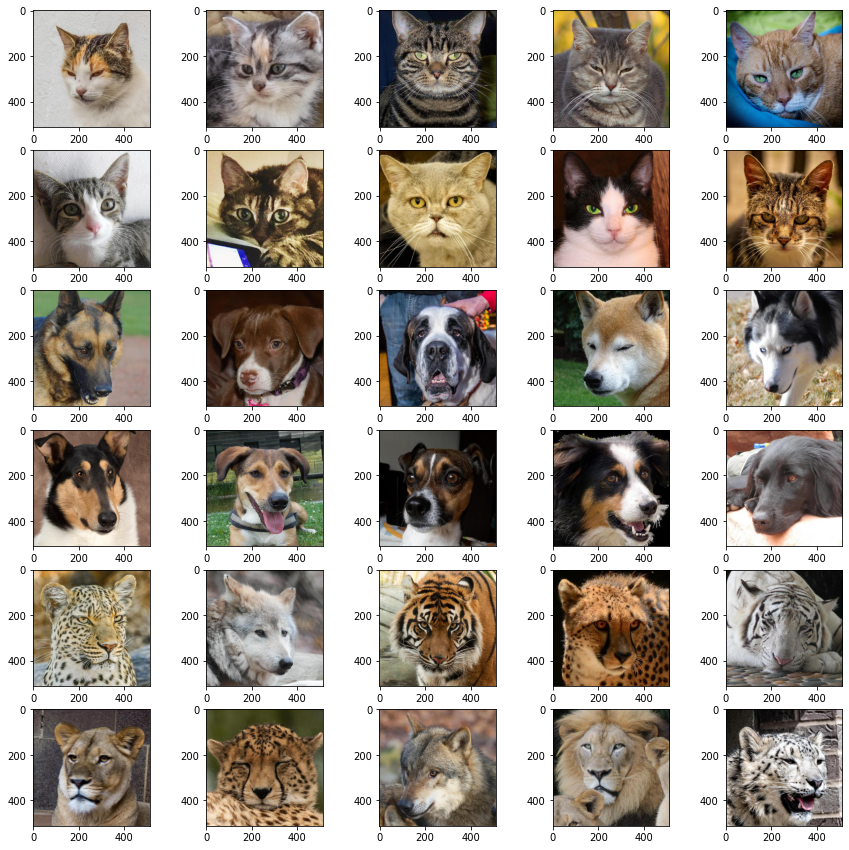

In [4]:
folder_cat = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/cat/'
folder_dog = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/dog/'
folder_wild = '/content/drive/MyDrive/Colab Notebooks/animal-faces/afhq/train/wild/'
plt.figure(figsize=(15,15))
sample_cat_images = random.sample(os.listdir(folder_cat),10)
sample_dog_images = random.sample(os.listdir(folder_dog),10)
sample_wild_images = random.sample(os.listdir(folder_wild),10)

for i in range(10): 
    plt.subplot(6,5,i+1)
    filename = folder_cat + sample_cat_images[i]
    if not os.path.exists(filename):
      print ('No such file:'+filename)
    image = imread(filename)
    plt.imshow(image)
for i in range(10): 
    plt.subplot(6,5,i+11)
    filename = folder_dog + sample_dog_images[i]
    if not os.path.exists(filename):
      print ('No such file:'+filename)
    image = imread(filename)
    plt.imshow(image)
for i in range(10): 
    plt.subplot(6,5,i+21)
    filename = folder_wild + sample_wild_images[i]
    if not os.path.exists(filename):
      print ('No such file:'+filename)
    image = imread(filename)
    plt.imshow(image)
plt.show()

## Data preparation

Although the more data the better, I will just use a subset of images downloaded from Kaggle. I will create train, val, test sets with 1000, 500, 500 files per animal category respectively. 

In [5]:
import shutil
import glob

In [10]:
gdrive_dir = '/content/drive/MyDrive/Colab Notebooks'
original_dataset_dir = gdrive_dir+'/animal-faces/afhq/train'

base_dir = gdrive_dir+'/animal-faces-small'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
val_dir   = os.path.join(base_dir,'val')
test_dir  = os.path.join(base_dir,'test')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)
if not os.path.exists(test_dir):
  os.mkdir(test_dir)
    
train_cat_dir = os.path.join(train_dir,'cat')
train_dog_dir = os.path.join(train_dir,'dog')
train_wild_dir = os.path.join(train_dir,'wild')
val_cat_dir = os.path.join(val_dir,'cat')
val_dog_dir = os.path.join(val_dir,'dog')
val_wild_dir = os.path.join(val_dir,'wild')
test_cat_dir = os.path.join(test_dir,'cat')
test_dog_dir = os.path.join(test_dir,'dog')
test_wild_dir = os.path.join(test_dir,'wild')

# train/cat
print("Copying data to animal-faces-small/train/cat/ ...")
if not os.path.exists(train_cat_dir):
    os.mkdir(train_cat_dir)
    os.chdir(original_dataset_dir + '/cat')
    for i in random.sample(glob.glob('*.jpg'), 1000):
        shutil.copy(i, train_cat_dir)

# train/dog
print("Copying data to animal-faces-small/train/dog/ ...")
if not os.path.exists(train_dog_dir):
    os.mkdir(train_dog_dir)
    os.chdir(original_dataset_dir + '/dog')
    for i in random.sample(glob.glob('*.jpg'), 1000):
        shutil.copy(i, train_dog_dir)

# train/wild
print("Copying data to animal-faces-small/train/wild/ ...")
if not os.path.exists(train_wild_dir):
    os.mkdir(train_wild_dir)
    os.chdir(original_dataset_dir + '/wild')
    for i in random.sample(glob.glob('*.jpg'), 1000):
        shutil.copy(i, train_wild_dir)

# val/cat
print("Copying data to animal-faces-small/val/cat/ ...")
if not os.path.exists(val_cat_dir):
    os.mkdir(val_cat_dir)
    os.chdir(original_dataset_dir + '/cat')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, val_cat_dir)

# val/dog
print("Copying data to animal-faces-small/val/dog/ ...")
if not os.path.exists(val_dog_dir):
    os.mkdir(val_dog_dir)
    os.chdir(original_dataset_dir + '/dog')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, val_dog_dir)

# val/wild
print("Copying data to animal-faces-small/val/wild/ ...")
if not os.path.exists(val_wild_dir):
    os.mkdir(val_wild_dir)
    os.chdir(original_dataset_dir + '/wild')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, val_wild_dir)

# test/cat
print("Copying data to animal-faces-small/test/cat/ ...")
if not os.path.exists(test_cat_dir):
    os.mkdir(test_cat_dir)
    os.chdir(original_dataset_dir + '/cat')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, test_cat_dir)

# test/dog
print("Copying data to animal-faces-small/test/dog/ ...")
if not os.path.exists(test_dog_dir):
    os.mkdir(test_dog_dir)
    os.chdir(original_dataset_dir + '/dog')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, test_dog_dir)

# test/wild
print("Copying data to animal-faces-small/test/wild/ ...")
if not os.path.exists(test_wild_dir):
    os.mkdir(test_wild_dir)
    os.chdir(original_dataset_dir + '/wild')
    for i in random.sample(glob.glob('*.jpg'), 500):
        shutil.copy(i, test_wild_dir)

print("Done!")

Copying data to animal-faces-small/train/cat/ ...
Copying data to animal-faces-small/train/dog/ ...
Copying data to animal-faces-small/train/wild/ ...
Copying data to animal-faces-small/val/cat/ ...
Copying data to animal-faces-small/val/dog/ ...
Copying data to animal-faces-small/val/wild/ ...
Copying data to animal-faces-small/test/cat/ ...
Copying data to animal-faces-small/test/dog/ ...
Copying data to animal-faces-small/test/wild/ ...
Done!


## Data pre-processing

It's time to pre-process data. I will rescale the pixel values (0-255) to the [0,1] interval and resize images to 128x128.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_dir, target_size=(128,128), classes=['cat', 'dog', 'wild'], batch_size=20)
val_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir, target_size=(128,128), classes=['cat', 'dog', 'wild'], batch_size=20)
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(128,128), classes=['cat', 'dog', 'wild'], batch_size=20, shuffle=False)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [13]:
imgs, labels = next(train_batches)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

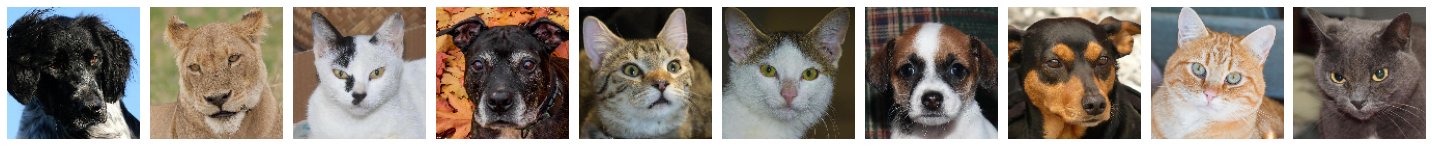

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [15]:
plotImages(imgs)
print(labels)

## Build a CNN

I will build a CNN using Sequential model.

In [16]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, MaxPool2D, Conv2D, Dropout
from keras.utils import plot_model

In [17]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=3, activation='softmax')

])

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

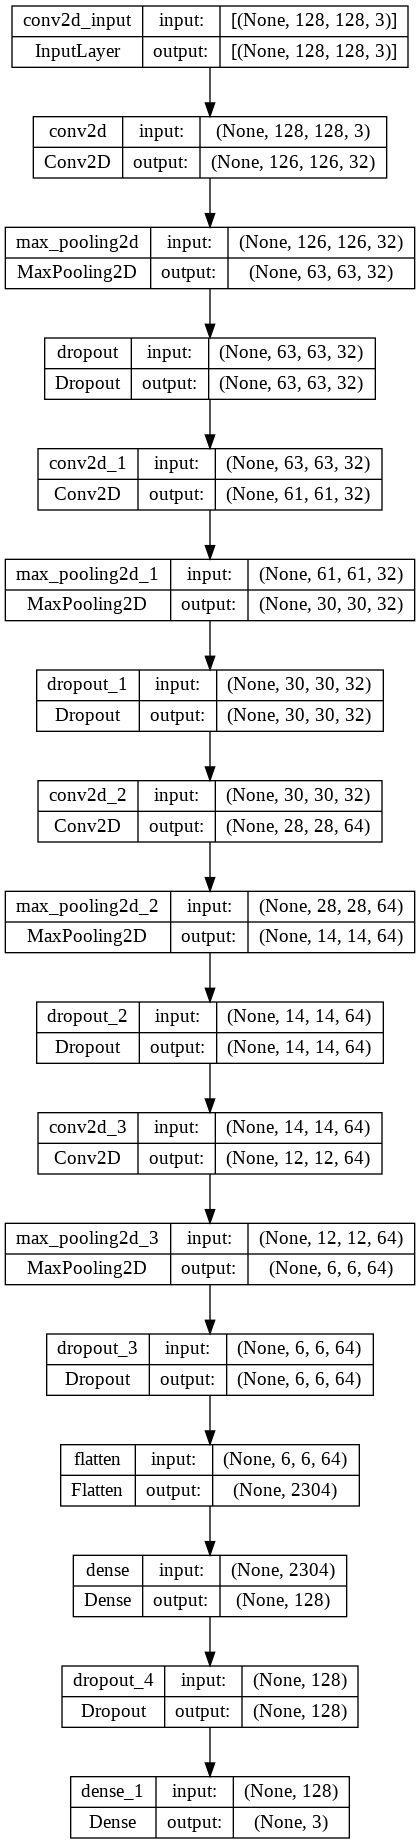

In [19]:
plot_model(model1, show_shapes=True)

## Compile and train the model

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
model1.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
monitor = EarlyStopping(monitor = 'val_loss', patience=3, min_delta=0.01)

In [23]:
history1=model1.fit(x=train_batches,
          epochs=15, 
          steps_per_epoch=len(train_batches),
          validation_data=val_batches,
          validation_steps=len(val_batches),
          callbacks=monitor,
          verbose=2)

model_path = '/content/drive/MyDrive/Colab Notebooks/models'
if not os.path.exists(model_path):
  os.mkdir(model_path)
model1.save(model_path+'/cat_dog_wild_m1.h5')

Epoch 1/15
150/150 - 2432s - loss: 1.0031 - accuracy: 0.4753 - val_loss: 0.4958 - val_accuracy: 0.8173 - 2432s/epoch - 16s/step
Epoch 2/15
150/150 - 24s - loss: 0.4749 - accuracy: 0.8127 - val_loss: 0.4874 - val_accuracy: 0.7967 - 24s/epoch - 162ms/step
Epoch 3/15
150/150 - 24s - loss: 0.3087 - accuracy: 0.8763 - val_loss: 0.2354 - val_accuracy: 0.9200 - 24s/epoch - 160ms/step
Epoch 4/15
150/150 - 24s - loss: 0.2319 - accuracy: 0.9110 - val_loss: 0.2797 - val_accuracy: 0.9033 - 24s/epoch - 159ms/step
Epoch 5/15
150/150 - 24s - loss: 0.1946 - accuracy: 0.9327 - val_loss: 0.2066 - val_accuracy: 0.9267 - 24s/epoch - 161ms/step
Epoch 6/15
150/150 - 24s - loss: 0.1623 - accuracy: 0.9387 - val_loss: 0.2288 - val_accuracy: 0.9247 - 24s/epoch - 161ms/step
Epoch 7/15
150/150 - 24s - loss: 0.1264 - accuracy: 0.9530 - val_loss: 0.1469 - val_accuracy: 0.9473 - 24s/epoch - 161ms/step
Epoch 8/15
150/150 - 25s - loss: 0.0916 - accuracy: 0.9653 - val_loss: 0.1303 - val_accuracy: 0.9613 - 25s/epoch - 1

## Draw Learning curves

Text(0.5, 0, 'epoch')

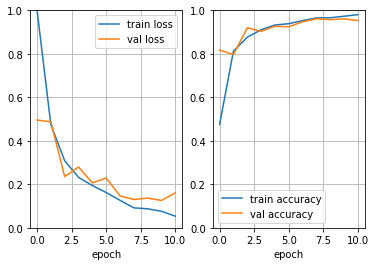

In [24]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history1.history['accuracy'], label='train accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

## Predict

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools 

In [26]:
predictions1 = model1.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [27]:
np.round(predictions1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [28]:
cm1 = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions1, axis=-1))

In [29]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
test_batches.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

Confusion matrix, without normalization
[[477  18   5]
 [  2 493   5]
 [  0  34 466]]


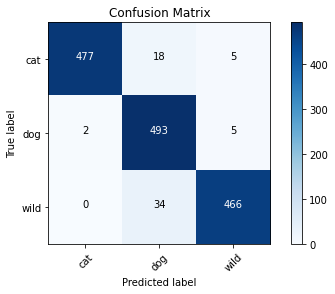

In [31]:
cm_plot_labels = ['cat','dog','wild']
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

As we can see the model was the best at labelling dogs, it was wrong only 7 times. It was not so good at recognizing wild animals, it missed 34 times. 

## Build a CNN based on VGG16


As a second I will build CNN based on pre-trained VGG16 model. I will not include fully connected layers, and I will freeze rest of the layers except last two.

In [32]:
from tensorflow.keras.applications import VGG16

In [33]:
train_batches_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_dir, batch_size=20, target_size=(128,128))
val_batches_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_dir, batch_size=20, target_size=(128,128))
test_batches_vgg = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_dir, batch_size=20, target_size=(128,128), shuffle=False)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [34]:
VGG16_conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3))
for layer in VGG16_conv_base.layers[:-2]:
  layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [35]:
model2 = Sequential()
for layer in VGG16_conv_base.layers:
  model2.add(layer)
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation="softmax"))

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)      

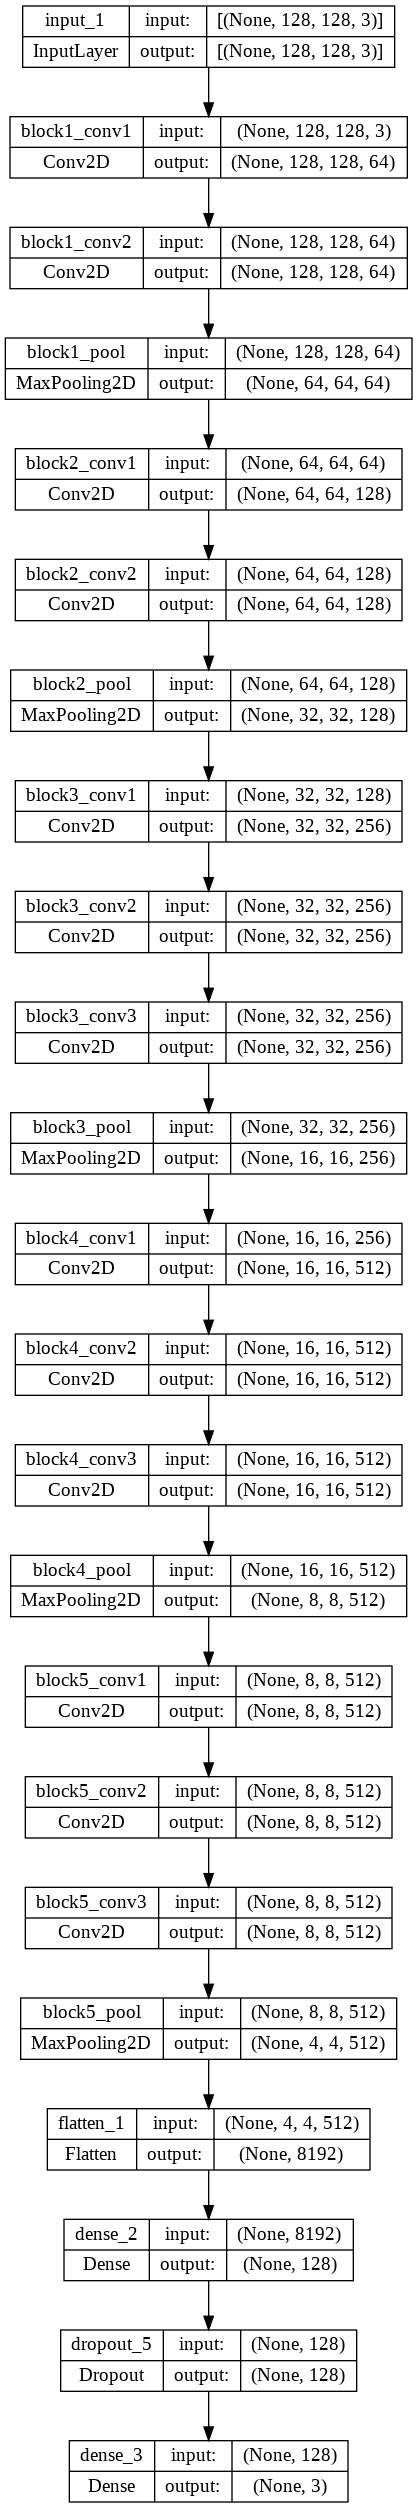

In [37]:
plot_model(model2, show_shapes=True)

## Compile and train (fine-tuned model)

In [38]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history2 = model2.fit(x=train_batches_vgg,
                     epochs=15,
                     steps_per_epoch=len(train_batches_vgg),
                     validation_data=val_batches_vgg,
                     validation_steps=len(val_batches_vgg),
                     callbacks=monitor,
                     verbose=2)

if not os.path.exists(model_path):
  os.mkdir(model_path)
model2.save(model_path+"/cat_dog_wild_m2.h5")

Epoch 1/15
150/150 - 29s - loss: 1.3260 - accuracy: 0.9540 - val_loss: 0.1626 - val_accuracy: 0.9907 - 29s/epoch - 196ms/step
Epoch 2/15
150/150 - 27s - loss: 0.1169 - accuracy: 0.9940 - val_loss: 0.1667 - val_accuracy: 0.9920 - 27s/epoch - 177ms/step
Epoch 3/15
150/150 - 27s - loss: 0.0682 - accuracy: 0.9933 - val_loss: 0.1868 - val_accuracy: 0.9947 - 27s/epoch - 180ms/step
Epoch 4/15
150/150 - 26s - loss: 0.2617 - accuracy: 0.9883 - val_loss: 0.3128 - val_accuracy: 0.9913 - 26s/epoch - 173ms/step


Text(0.5, 0, 'epoch')

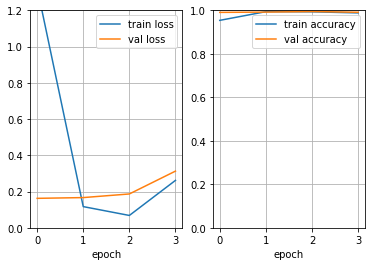

In [40]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.ylim([0,1.2])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.ylim([0,1.0])
plt.xlabel('epoch')

## Predict (fine-tuned model)

In [41]:
 predictions2 = model2.predict(x=test_batches_vgg, steps=len(test_batches_vgg), verbose=0)

In [42]:
np.round(predictions2)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [43]:
cm2 = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions2, axis=-1))

Confusion matrix, without normalization
[[499   1   0]
 [  0 496   4]
 [  1   1 498]]


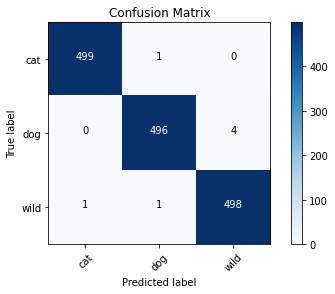

In [44]:
cm_plot_labels = ['cat','dog','wild']
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels, title='Confusion Matrix')

Fine-tuned model was was the best at labelling cats, it was wrong only once. It was not so good at recognizing dogs, it missed 4 times. But still the result is impressive.

## Summary

Both of the models did a pretty good job at recognizing animals, but if it comes to comparing them, the fine-tuned one had higher accuracy (around 99%) and it took less time to train it. I can say that fine-tuning is very powerful technique and allows to get great results in short time.